## Report LAB 1

1. plot the function:

    \begin{equation}
      f(x_1,x_2) = x^2_1 (4- 2.1x^2_1+\frac{1}{3}x^4_1)+x_1x_2+x^2_2(-4+4x^2_2)
    \end{equation}

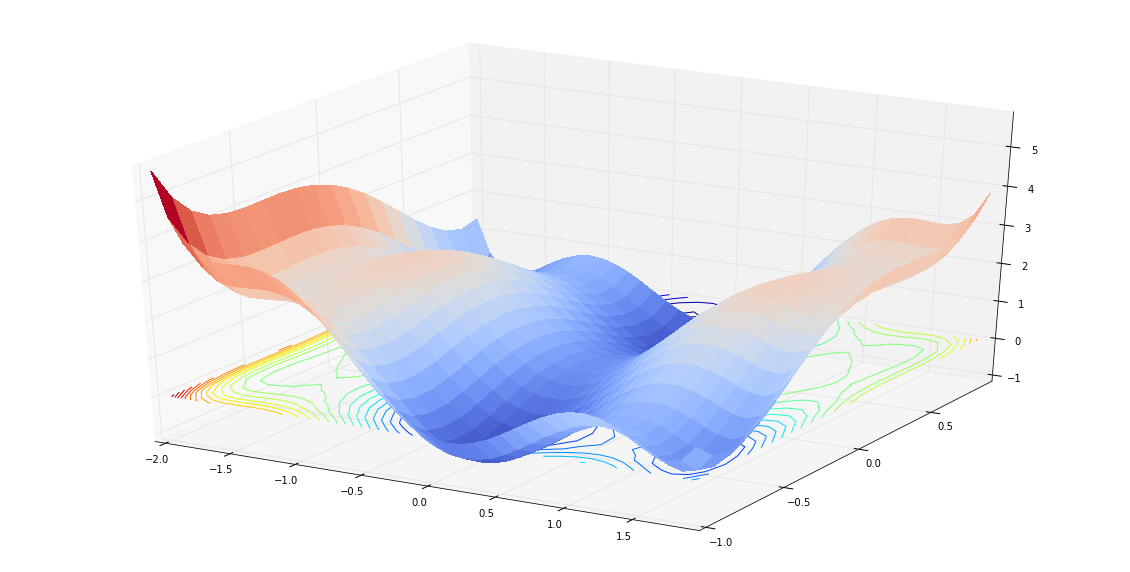

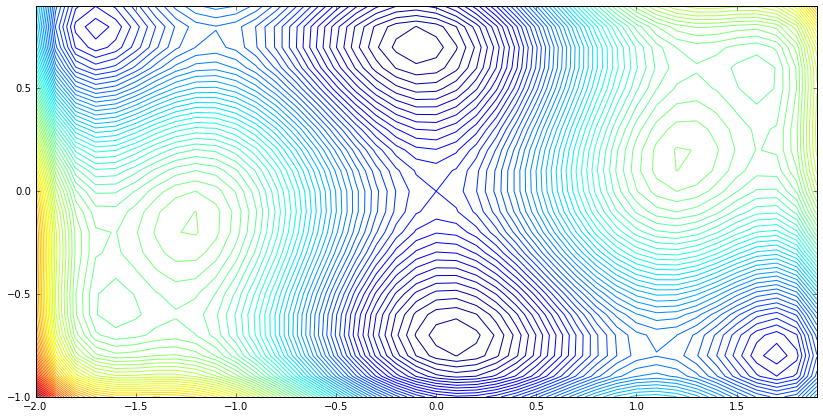

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-2, 2, 0.1),
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)

Z = np.multiply(X**2,(4-2.1* X**2 + (1./3)*X**4)) + np.multiply(X,Y)+ np.multiply((Y**2),(-4+4*Y**2))

# Surface plot 3D + contour plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.contour(X,Y,Z,30,zdir='z',offset=0)

plt.figure(figsize=(14,7))
plt.contour(X,Y,Z,100)
plt.show()




$2.$ Analytically compute the gradient $\nabla \, f(x)$, and plot $\|\nabla \, f(x)\|^2$ within the previous range.  

\begin{equation}
   \frac{f(x_1,x_2)}{\delta x_1} = 8x_1 - 8.4x^3_1+2x^5_1+x_2
\end{equation}

\begin{equation}
   \frac{f(x_1,x_2)}{\delta x_2} = x_1 - 8x_2+16x^3_2
\end{equation}



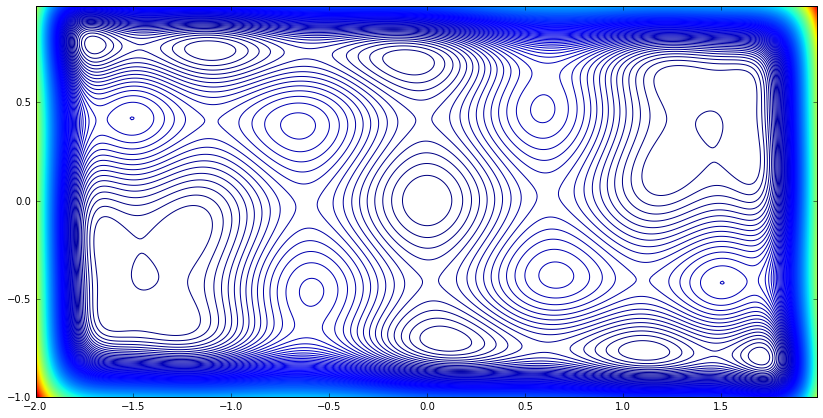

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

X = np.arange(-2, 2, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)

grad1 = 8*X-8.4*(X**3)+2*(X**5)+Y
grad2 = X - 8*Y + 16*(Y**3)
N = (grad1)**2 + (grad2)**2

# contour plot
plt.figure(figsize=(14,7))
plt.contour(X,Y,N,300)
plt.show()


From above graphic, the stationary points could be somewhere inside those "small cicles". They could be maximum, minimum or saddle point. 

$3.$ Numerically compute an approximation of the points x* at which $\nabla \, f(x^*)=0$

In [8]:
# Searching for stationary points, using brute force

stationary_pts = []
for x in range (1, N.shape[0]-1):
    for y in range (0, N.shape[1]-1):  # x,y are coordinate at our grid where we have stationary points
        if (N[x,y]<N[x-1, y-1] and N[x,y]<N[x-1, y] and N[x,y]<N[x-1, y+1] and 
            N[x,y]<N[x, y-1] and N[x,y]<N[x, y+1] and 
            N[x,y]<N[x+1, y-1] and N[x,y]<N[x+1, y]and N[x,y]<N[x+1, y+1]):
                
                print "(", X[x,y], Y[x,y], ") The norm^2 at this point is: ",N[x,y]
                stationary_pts.append([X[x,y], Y[x,y]])
                y+=1    # the point next to minimum won't be minimum


( 1.7 -0.8 ) The norm^2 at this point is:  0.0136566436
( 1.11 -0.77 ) The norm^2 at this point is:  0.00125592847393
( 0.09 -0.71 ) The norm^2 at this point is:  0.00190076195145
( -1.3 -0.6 ) The norm^2 at this point is:  0.0027735236
( -1.61 -0.57 ) The norm^2 at this point is:  0.00104526435979
( -1.64 -0.23 ) The norm^2 at this point is:  0.000674582530565
( -1.23 -0.16 ) The norm^2 at this point is:  0.000241818116125
( 1.7763568394e-15 8.881784197e-16 ) The norm^2 at this point is:  2.56379794197e-28
( 1.23 0.16 ) The norm^2 at this point is:  0.000241818116125
( 1.64 0.23 ) The norm^2 at this point is:  0.000674582530567
( 1.61 0.57 ) The norm^2 at this point is:  0.00104526435979
( 1.3 0.6 ) The norm^2 at this point is:  0.0027735236
( -0.09 0.71 ) The norm^2 at this point is:  0.00190076195145
( -1.11 0.77 ) The norm^2 at this point is:  0.00125592847394
( -1.7 0.8 ) The norm^2 at this point is:  0.0136566436


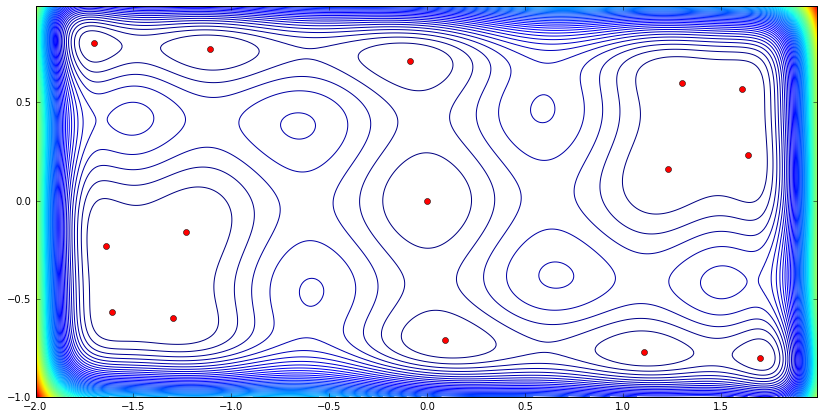

In [9]:
# check obtained stationary points with the graphic in step 2

%matplotlib inline
import matplotlib.pyplot as plt

X,Y = np.arange(-2, 2, 0.01),np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
#Z = np.multiply(X**2,(4-2.1* X**2 + (1./3)*X**4)) + np.multiply(X,Y)+ np.multiply((Y**2),(-4+4*Y**2))

plt.figure(figsize=(14,7))
#plt.contour(X,Y,Z,100)
plt.contour(X,Y,N,100)

for s in stationary_pts:
    plt.plot(s[0], s[1],'ro')

plt.show()


$4.$ Now let's compute the Hessian of $f(x_1,x_2)$ and evaluate it at the stationary points we found.

https://en.wikipedia.org/wiki/Second_partial_derivative_test

Let $D(x_1,x_2)$ be the determinant of Hessian matrix H. 

$D(x_1,x_2)=det(H(x_1,x_2))=f_{x_1x_2}(x_1,x_2)f_{x_2x_2}(x_1,x_2)-(f_{x_1x_2}(x_1,x_2))^2$

Suppose that (a,b) is a critical point of f, then the second partial derivative test asserts the following:

1. If D(a,b)>0 and $f_{x_1x_1}(a,b)>0$ then (a,b) is a local minimum of f.

2. If D(a,b)>0 and $f_{x_1x_1}(a,b)<0$ then (a,b) is a local maxinum of f.

3. If D(a,b)<0 then (a,b) is a saddle point of f.

4. If D(a,b)=0 then the second derivative test is inconclusive, and the point (a, b) could be any of a minimum, maximum or saddle point.






In [10]:
# Hessian matrix
def hessian (X,Y): 
    DD_XX = 8-25.2*X**2+10*X**4  
    DD_YY = 48*Y**2-8
    DD_XY = 1
    DD_YX = 1
    H = np.array([[DD_XX, DD_XY], [DD_YX, DD_YY]])
    return H

# determinant of Hassian matrix 
def det (H):
    return H[0][0]*H[1][1]-H[0][1]-H[1][0]


# second derivative test
loc_minimum = []
loc_maximum = []
saddle = []
count_min = count_max = count_saddle = 0

for s in stationary_pts:
    H=hessian(s[0],s[1])
    #print det(H), H[0][0]
    if det(H)>0:
        if H[0][0]>0:
            print s," is a local minimum of f"
            loc_minimum.append(s)
            count_min +=1
        if H[0][0]<0:
            print s," is a local maximum of f"
            loc_maximum.append(s)
            count_max +=1
    if det(H)<0: 
        saddle.append(s)
        count_saddle +=1
        print s," is a saddle point of f"
    if det(H)==0: 
        print "the second derivative test is inconclusive"

print "\nThere are", count_min, "local minimums:\n", loc_minimum
print "\nThere are", count_max, "local maximums:\n", loc_maximum
print "\nThere are", count_saddle, "saddle points:\n", saddle

[1.7000000000000033, -0.79999999999999982]  is a local minimum of f
[1.110000000000003, -0.7699999999999998]  is a saddle point of f
[0.090000000000001634, -0.70999999999999974]  is a local minimum of f
[-1.2999999999999994, -0.59999999999999964]  is a saddle point of f
[-1.6099999999999997, -0.56999999999999962]  is a local minimum of f
[-1.6399999999999997, -0.22999999999999932]  is a saddle point of f
[-1.2299999999999993, -0.15999999999999925]  is a local maximum of f
[1.7763568394002505e-15, 8.8817841970012523e-16]  is a saddle point of f
[1.2300000000000031, 0.16000000000000103]  is a local maximum of f
[1.6400000000000032, 0.23000000000000109]  is a saddle point of f
[1.610000000000003, 0.57000000000000139]  is a local minimum of f
[1.3000000000000029, 0.60000000000000142]  is a saddle point of f
[-0.089999999999998304, 0.71000000000000152]  is a local minimum of f
[-1.1099999999999992, 0.77000000000000157]  is a saddle point of f
[-1.6999999999999997, 0.8000000000000016]  is a 

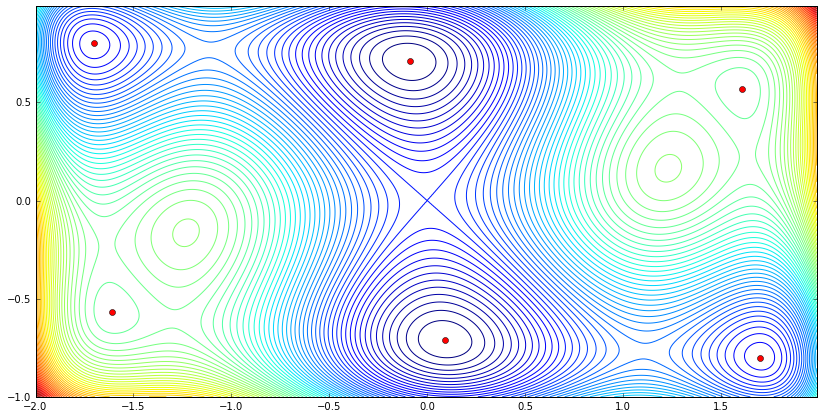

In [12]:
# plot minimums

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X,Y = np.arange(-2, 2, 0.01),np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.multiply(X**2,(4-2.1* X**2 + (1./3)*X**4)) + np.multiply(X,Y)+ np.multiply((Y**2),(-4+4*Y**2))

plt.figure(figsize=(14,7))
plt.contour(X,Y,Z,100)
for p in loc_minimum:
    plt.plot(p[0],p[1],'ro')